In [ ]:


import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
!pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 825.8 kB/s eta 0:00:47
   ---------------------------------------- 0.1/38.8 MB 825.8 kB/s eta 0:00:47
   ---------------------------------------- 0.1/38.8 MB 726.2 kB/s eta 0:00:54
   ---------------------------------------- 0.1/38.8 MB 722.1 kB/s eta 0:00:54
   ---------------------------------------- 0.2/38.8 MB 701.4 kB/s eta 0:00:56
   ---------------------------------------- 0.2/38.8 MB 778.2 kB/s eta 0:00:50
   ---------------------------------------- 0.2/38.8 MB 838.1 kB/s eta 0:00:47
   ---------------------------------------- 0.3/38.8 MB 853.3 kB/s eta 0:00:46
   ---------------------------------------- 0.3/38.8 MB 827.2 kB/s eta 0:00:47
   ---------------------------------------- 0.3/38.8 MB 811.9 kB/s eta 0:00:48


In [6]:
!pip install keras

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121


In [ ]:
import os
import pandas as pd

data_train = []
type_of_disease = ['COVID-19', 'Non-COVID-19']  # Match folder names exactly
data_directory = r'C:\Users\beeoi\Desktop\data science\COVID-19_Lung_CT_Scans'  # Use raw string for paths
train_directory = os.path.join(data_directory)

for id, sp in enumerate(type_of_disease):
    disease_path = os.path.join(train_directory, sp)
    if not os.path.exists(disease_path):
        raise FileNotFoundError(f"Directory does not exist: {disease_path}")
    
    for file in os.listdir(disease_path):
        data_train.append([f'{sp}/{file}', id, sp])

train = pd.DataFrame(data_train, columns=['Image', 'Id of Disease', 'Type of Disease'])


print(train.head())


                        Image  Id of Disease Type of Disease
0  COVID-19/COVID-19_0001.png              0        COVID-19
1  COVID-19/COVID-19_0002.png              0        COVID-19
2  COVID-19/COVID-19_0003.png              0        COVID-19
3  COVID-19/COVID-19_0004.png              0        COVID-19
4  COVID-19/COVID-19_0005.png              0        COVID-19


In [20]:
train.head()

,Image,Id of Disease,Type of Disease
0,COVID-19/COVID-19_0001.png,0,COVID-19
1,COVID-19/COVID-19_0002.png,0,COVID-19
2,COVID-19/COVID-19_0003.png,0,COVID-19
3,COVID-19/COVID-19_0004.png,0,COVID-19
4,COVID-19/COVID-19_0005.png,0,COVID-19


In [ ]:

SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))

In [22]:
train.head()

,Image,Id of Disease,Type of Disease
0,COVID-19/COVID-19_0240.png,0,COVID-19
1,COVID-19/COVID-19_5644.png,0,COVID-19
2,COVID-19/COVID-19_3816.png,0,COVID-19
3,COVID-19/COVID-19_0213.png,0,COVID-19
4,COVID-19/COVID-19_6351.png,0,COVID-19


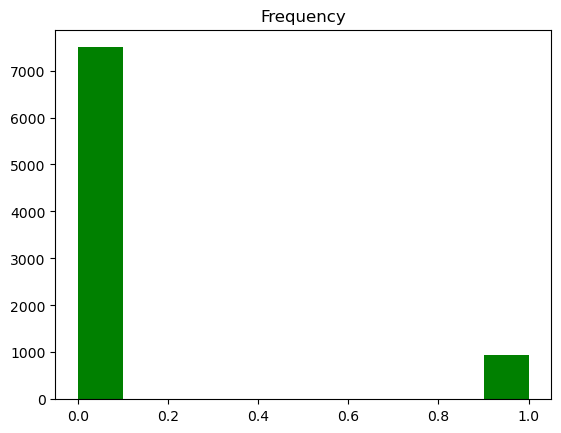

In [ ]:

plt.hist(train['Id of Disease'],color = "green")
plt.title('Frequency')
plt.show()

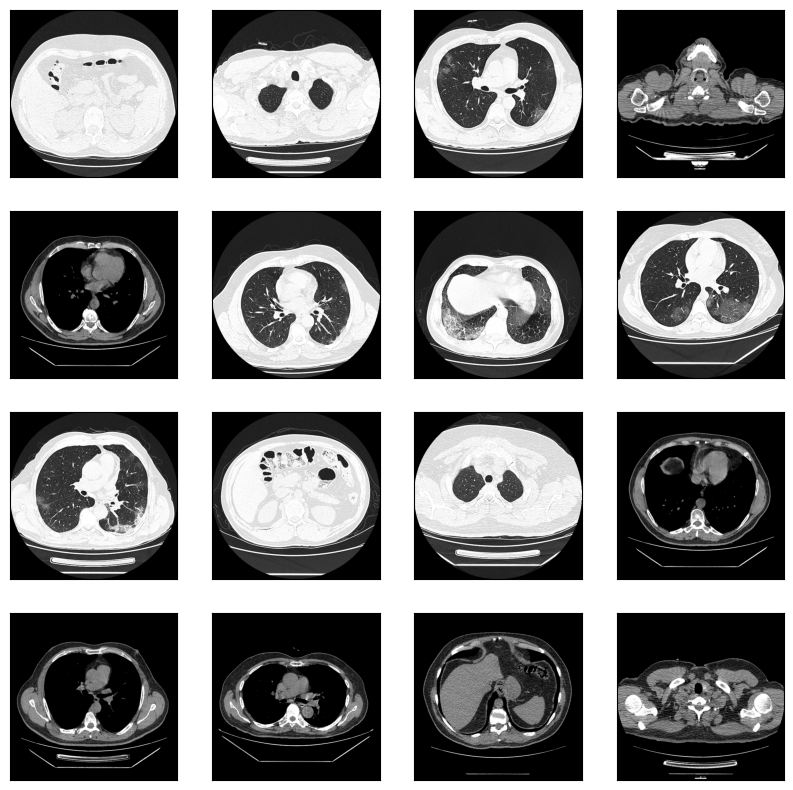

In [ ]:


def show_covid_images(disease_type, r, c):
    fig,ax = plt.subplots(r,c, figsize=(10,10))
    disease_image = train['Image'][train['Type of Disease'] == disease_type].values
    n = 0
    for i in range(r):
        for j in range(c):
            image = os.path.join(data_directory, disease_image[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image))
            n += 1
            
show_covid_images('COVID-19',4,4) 

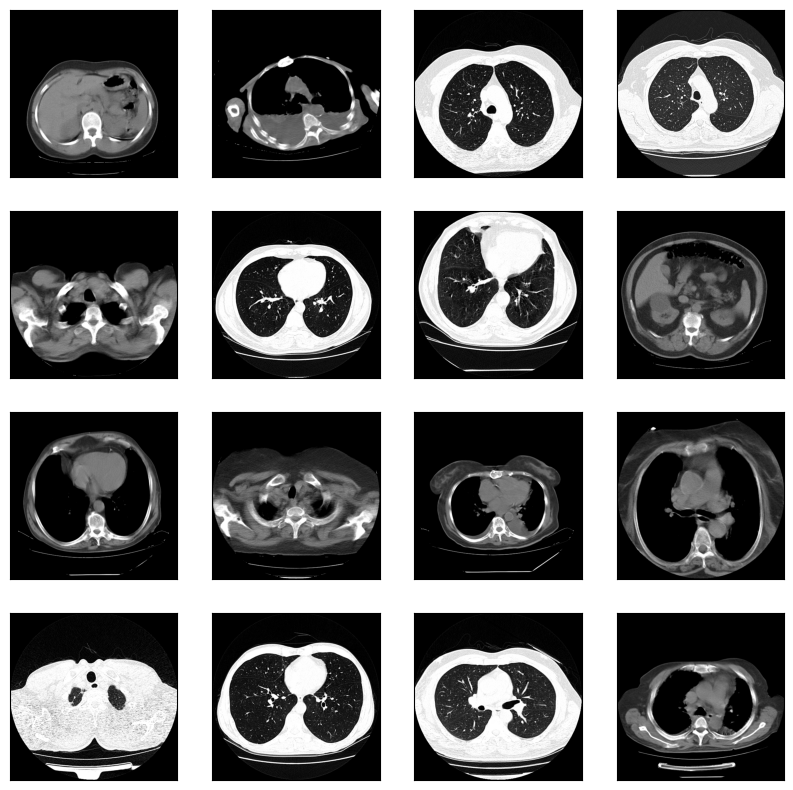

In [ ]:

def show_non_covid_images(disease_type, r, c):
    fig,ax = plt.subplots(r,c, figsize=(10,10))
    disease_image = train['Image'][train['Type of Disease'] == disease_type].values
    n = 0
    for i in range(r):
        for j in range(c):
            image = os.path.join(data_directory, disease_image[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image))
            n += 1
            
show_non_covid_images('Non-COVID-19',4,4)  

In [51]:
import numpy as np
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
import keras.utils as image
import kagglehub



In [60]:
import os
print("Current working directory:", os.getcwd())
cat_train_path_covid = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/"
cat_train_path_noncovid = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/Non-COVID-19/"
cat_test_path = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/CT_COVID/"






Current working directory: c:\Users\beeoi\Downloads


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
print("Current working directory:", os.getcwd())
cat_train_path_covid = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/"
cat_train_path_noncovid = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/Non-COVID-19/"
cat_test_path = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/CT_COVID/"
paths = [cat_train_path_covid, cat_train_path_noncovid, cat_test_path]
for path in paths:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Directory not found: {path}")
    else:
        print(f"Path exists: {path}")
cat_train = []
cat_test = []

for filename in os.listdir(cat_train_path_covid):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        filepath = os.path.join(cat_train_path_covid, filename)
        img = image.load_img(filepath, target_size=(256, 256))
        cat_train.append(image.img_to_array(img))

for filename in os.listdir(cat_train_path_noncovid):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        filepath = os.path.join(cat_train_path_noncovid, filename)
        img = image.load_img(filepath, target_size=(256, 256))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)
print(f"Training data shape: {cat_train.shape}")

for filename in os.listdir(cat_test_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        filepath = os.path.join(cat_test_path, filename)
        img = image.load_img(filepath, target_size=(256, 256))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)
print(f"Test data shape: {cat_test.shape}")


Current working directory: c:\Users\beeoi\Downloads
Path exists: C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/
Path exists: C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/Non-COVID-19/
Path exists: C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/CT_COVID/
Training data shape: (8439, 256, 256, 3)
Test data shape: (349, 256, 256, 3)


In [62]:
print("cat_train", cat_train.shape)
print("cat_test", cat_test.shape)

cat_train (8439, 256, 256, 3)
cat_test (349, 256, 256, 3)


In [63]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

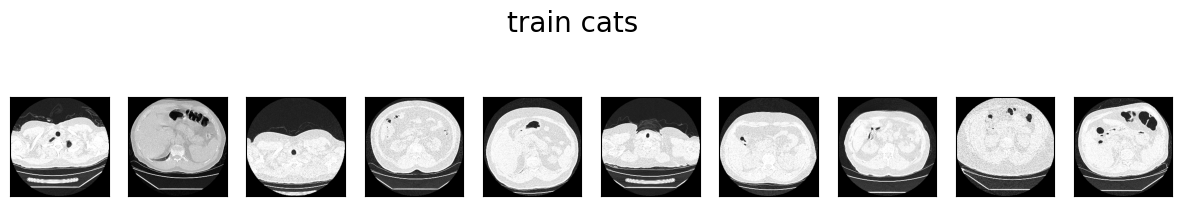

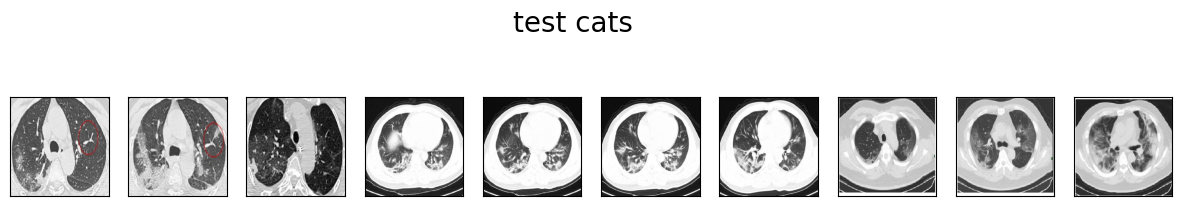

In [64]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

In [65]:
input_layer = Input(shape=(256, 256, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(3, (3, 3), activation='relu', padding='same')(code_layer)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [66]:
cat_AE = Model(input_layer, output_layer)
cat_AE.compile(optimizer='adam', loss='mse')
cat_AE.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 3)    │           219 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CODE (MaxPooling2D)             │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 3)      │            84 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 64, 64, 8)      │           224 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 128, 128, 16)   │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 128, 128, 16)   │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Conv2D)                 │ (None, 256, 256, 3)    │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,714 (41.85 KB)

 Trainable params: 10,714 (41.85 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
cat_AE.fit(cat_train, cat_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(cat_test, cat_test))

Epoch 1/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 86s 267ms/step - loss: 4981.5439 - val_loss: 1159.8982
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1566s 6s/step - loss: 747.7144 - val_loss: 975.8073
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 105s 391ms/step - loss: 632.4276 - val_loss: 832.0556
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 170s 640ms/step - loss: 576.4332 - val_loss: 699.0467
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 188s 703ms/step - loss: 549.4194 - val_loss: 663.5673
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 188s 698ms/step - loss: 533.1747 - val_loss: 631.3898
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 190s 711ms/step - loss: 508.4573 - val_loss: 601.7538
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 192s 716ms/step - loss: 498.8272 - val_loss: 585.2623
Epoch 9/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 190s 712ms/step - loss: 488.0339 - val_loss: 562.8129
Epoch 10/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 189s 703ms/step - loss: 492.5222 - val_loss: 558.3290
Epoch 11/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 190s 713ms/step - l

In [68]:
cat_AE.save("generator.h5")

In [69]:
get_encoded_cat = Model(inputs=cat_AE.input, outputs=cat_AE.get_layer("CODE").output)

In [70]:
encoded_cat = get_encoded_cat.predict(cat_test)
print(encoded_cat.shape)
encoded_cat = encoded_cat.reshape((len(cat_test), 64*64*3))
encoded_cat.shape


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
(349, 64, 64, 3)


(349, 12288)

In [71]:
reconstructed_cats = cat_AE.predict(cat_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step


In [72]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(10,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

(349, 256, 256, 3)


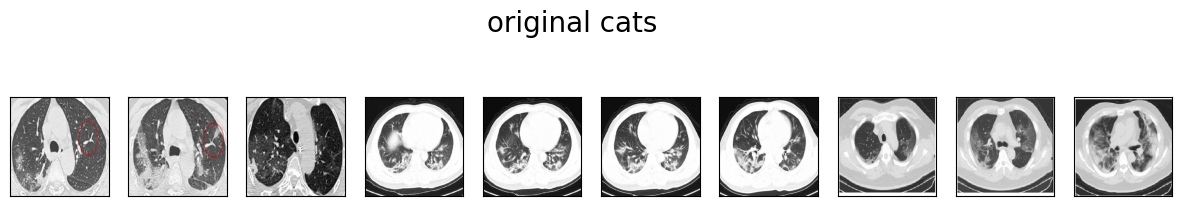

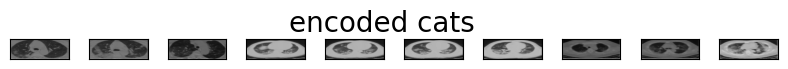

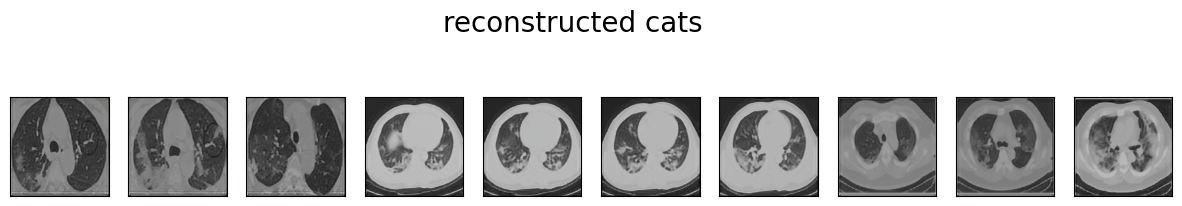

In [73]:
show_cat_data(cat_test, title="original cats")
print(cat_test.shape)
#encoded_cat_reshaped = encoded_cat.reshape(-1, 32, 64)
show_data(encoded_cat, height=64, width=64*3, title="encoded cats")
show_cat_data(reconstructed_cats, title="reconstructed cats")

In [74]:
model_for_code_layer = Model(inputs=input_layer, outputs=code_layer)

In [75]:
single_input_sample=cat_test[1]
single_input_sample = single_input_sample[np.newaxis, ...]
single_input_sample=model_for_code_layer.predict(single_input_sample)
single_input_sample = single_input_sample.squeeze()
print(single_input_sample.shape)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
(64, 64, 3)


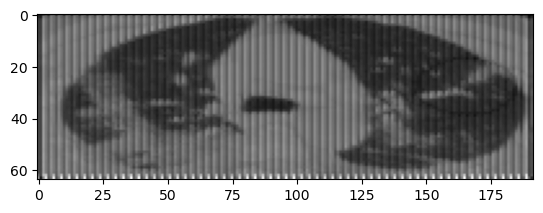

In [76]:
plt.imshow(single_input_sample.reshape((64,64*3)))
plt.gray()

In [77]:
import keras.utils as image
cat_train_path = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/"
cat_test_path = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/Non-COVID-19/"


cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        img = image.load_img(cat_train_path+filename, target_size=(256, 256))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        img = image.load_img(cat_test_path+filename, target_size=(256, 256))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

In [ ]:
from PIL import Image
import numpy as np
import os
image_data = get_encoded_cat.predict(cat_train)
min_val = image_data.min()
max_val = image_data.max()

image_data = ((image_data - min_val) / (max_val - min_val) * 255).astype('uint8')
print(image_data.shape)
output_dir = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/"
os.makedirs(output_dir, exist_ok=True)

for i in range(image_data.shape[0]):
    image = Image.fromarray(image_data[i])
    image.save(os.path.join(output_dir, f'image_{i}.png'))

print(f'Saved {image_data.shape[0]} images to {output_dir}')

235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step
(7495, 64, 64, 3)
Saved 7495 images to C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/


In [ ]:
from PIL import Image
import numpy as np
import os

image_data = get_encoded_cat.predict(cat_test)
min_val = image_data.min()
max_val = image_data.max()

image_data = ((image_data - min_val) / (max_val - min_val) * 255).astype('uint8')
print(image_data.shape)
output_dir = r"C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/Non-COVID-19/"
os.makedirs(output_dir, exist_ok=True)

for i in range(image_data.shape[0]):
    image = Image.fromarray(image_data[i])
    image.save(os.path.join(output_dir, f'image_{i}.png'))

print(f'Saved {image_data.shape[0]} images to {output_dir}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
(944, 64, 64, 3)
Saved 944 images to C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/Non-COVID-19/


In [81]:
print(image_data[2])

[[[0 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [0 0 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 ...

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [1 0 0]]]


In [82]:
data_train = []
type_of_disease =['COVID-19', 'non-COVID-19']
data_directory = 'C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans'
train_directory = os.path.join(data_directory)

for id, sp in enumerate(type_of_disease):
#     print('************')
#     print(id)
#     print(sp)
    for file in os.listdir(os.path.join(train_directory, sp)):
#         print('************')
#         print(file)
        data_train.append(['{}/{}'.format(sp, file), id, sp])
        
train = pd.DataFrame(data_train, columns=['Image', 'Id of Disease','Type of Disease'])

In [83]:
train.head()

,Image,Id of Disease,Type of Disease
0,COVID-19/COVID-19_0001.png,0,COVID-19
1,COVID-19/COVID-19_0002.png,0,COVID-19
2,COVID-19/COVID-19_0003.png,0,COVID-19
3,COVID-19/COVID-19_0004.png,0,COVID-19
4,COVID-19/COVID-19_0005.png,0,COVID-19


In [84]:
#make the order of training set randomize
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))

In [85]:
train.head()

,Image,Id of Disease,Type of Disease
0,COVID-19/image_3406.png,0,COVID-19
1,COVID-19/image_2959.png,0,COVID-19
2,COVID-19/COVID-19_4171.png,0,COVID-19
3,non-COVID-19/Non-COVID-19_186.png,1,non-COVID-19
4,COVID-19/image_5445.png,0,COVID-19


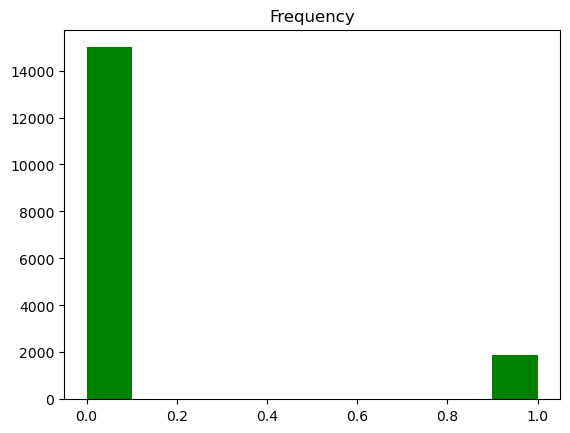

In [86]:
plt.hist(train['Id of Disease'],color = "green")
plt.title('Frequency')
plt.show()

In [87]:
SIZE_OF_IMAGE = 64
def read_image(imagepath):
    return cv2.imread(os.path.join(data_directory, imagepath))

def resize_image(image, image_Size):
    return cv2.resize(image.copy(), image_Size, interpolation=cv2.INTER_AREA)

In [ ]:

x_train = np.zeros((train.shape[0], SIZE_OF_IMAGE, SIZE_OF_IMAGE, 3))

for i, file in tqdm(enumerate(train['Image'].values)):
    image = read_image(file)
    
    if image is not None:
        x_train[i] = resize_image(image,(SIZE_OF_IMAGE, SIZE_OF_IMAGE))
        
X_Train = x_train / 255
print('Train shape: {}'.format(X_Train.shape))

16879it [03:43, 75.66it/s] 


Train shape: (16879, 64, 64, 3)


In [ ]:

y_train = train['Id of Disease'].values
y_train = to_categorical(y_train, num_classes=2)

In [ ]:

BATCH_SIZE = 64

X_train, X_test, Y_train, Y_test = train_test_split(X_Train,y_train, test_size=0.2, random_state=SEED)

In [91]:
print(X_test.shape)

(3376, 64, 64, 3)


In [92]:
EPOCHS = 30
SIZE=64
N_ch=3

In [ ]:
def build_densenet3():
    from tensorflow.keras.applications import DenseNet121
    from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adam

    densenet = DenseNet121(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output = Dense(2, activation='softmax', name='root')(x)
    model3 = Model(input, output)


    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model3.summary()

    return model3

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


checkpoint = ModelCheckpoint('model.keras', verbose=1, save_best_only=True)  # Use .keras extension
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X_train)

model = build_densenet()
hist = model.fit(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=2,
    callbacks=[checkpoint, annealer],
    validation_data=(X_test, Y_test)
)


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 2, 2, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,305,622 (27.87 MB)

 Trainable params: 7,219,414 (27.54 MB)

 Non-trainable params: 86,208 (336.75 KB)

c:\Users\beeoi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30

Epoch 1: val_loss improved from inf to 0.46333, saving model to finalClassifier.keras
210/210 - 819s - 4s/step - accuracy: 0.6277 - loss: 0.9026 - val_accuracy: 0.8365 - val_loss: 0.4633 - learning_rate: 0.0020
Epoch 2/30


c:\Users\beeoi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 0.46333 to 0.45226, saving model to finalClassifier.keras
210/210 - 35s - 164ms/step - accuracy: 0.7500 - loss: 0.6376 - val_accuracy: 0.8469 - val_loss: 0.4523 - learning_rate: 0.0020
Epoch 3/30

Epoch 3: val_loss improved from 0.45226 to 0.24649, saving model to finalClassifier.keras
210/210 - 321s - 2s/step - accuracy: 0.8356 - loss: 0.4131 - val_accuracy: 0.9271 - val_loss: 0.2465 - learning_rate: 0.0020
Epoch 4/30

Epoch 4: val_loss improved from 0.24649 to 0.24632, saving model to finalClassifier.keras
210/210 - 32s - 152ms/step - accuracy: 0.9219 - loss: 0.2757 - val_accuracy: 0.9274 - val_loss: 0.2463 - learning_rate: 0.0020
Epoch 5/30

Epoch 5: val_loss improved from 0.24632 to 0.18673, saving model to finalClassifier.keras
210/210 - 318s - 2s/step - accuracy: 0.9213 - loss: 0.2502 - val_accuracy: 0.9508 - val_loss: 0.1867 - learning_rate: 0.0020
Epoch 6/30

Epoch 6: val_loss improved from 0.18673 to 0.18587, saving model to finalClassifier.ker

106/106 ━━━━━━━━━━━━━━━━━━━━ 30s 242ms/step


Text(0.5, 155.72222222222217, 'Predicted')

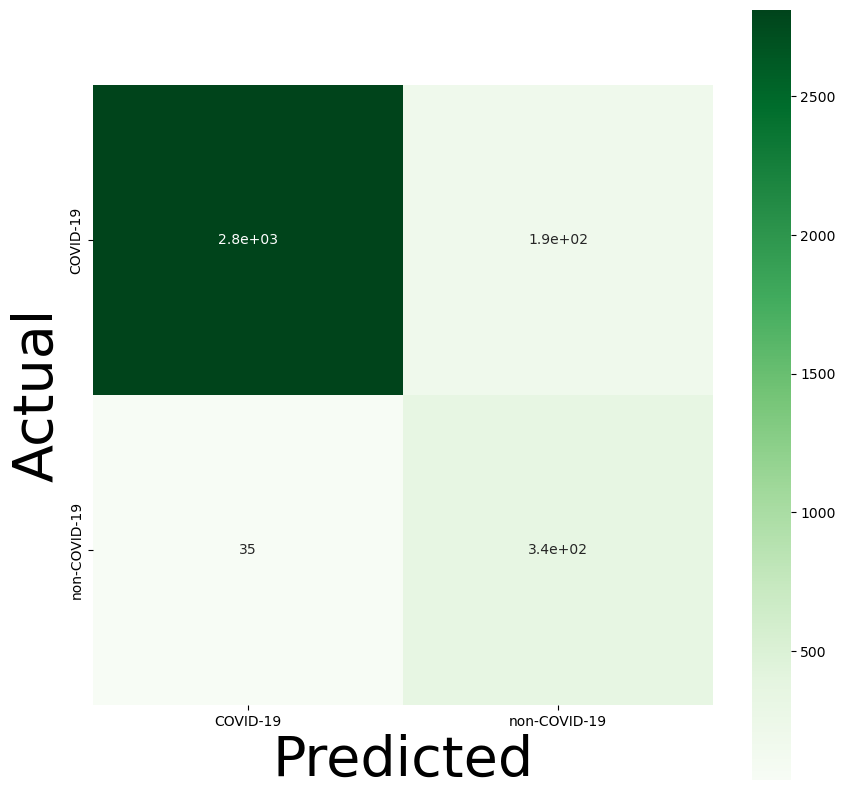

In [ ]:

Y_predict = model3.predict(X_test)
Y_predict = np.argmax(Y_predict, axis= 1)
Y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_true, Y_predict)
plt.figure(figsize=(10,10))
ax= sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=type_of_disease,yticklabels=type_of_disease)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

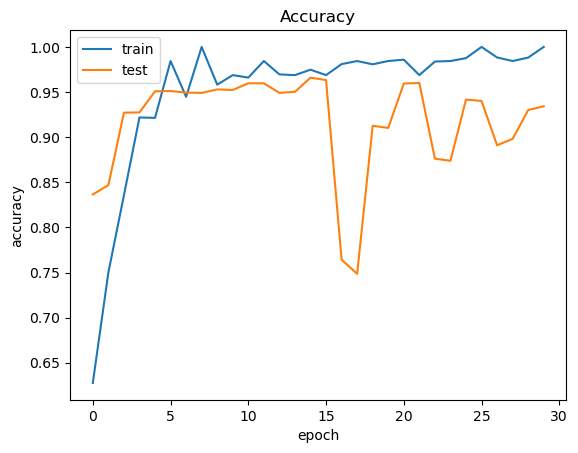

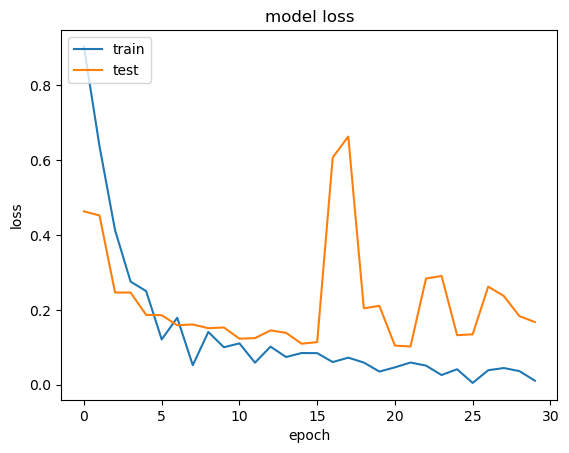

In [ ]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model input shape: (None, 128, 128, 3)
Prepared image shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction probabilities: [0.99216473 0.00783531]
Prediction: Covid-19


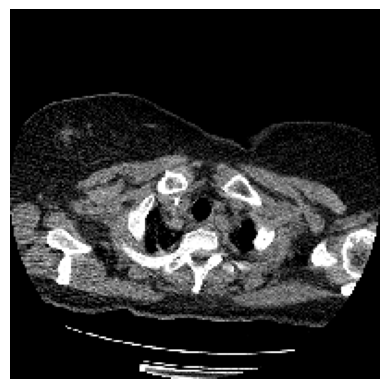

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
import tensorflow as tf

def resize_image(image, image_size):

    if isinstance(image, Image.Image):
        image_np = np.array(image)
    else:
        image_np = image
    
    if len(image_np.shape) < 2 or len(image_np.shape) > 3:
        raise ValueError("Invalid image format. Expected 2D or 3D array.")

    return cv2.resize(image_np, image_size, interpolation=cv2.INTER_AREA)


dir = 'C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/COVID-19/COVID-19_2910.png'
img = Image.open(dir).convert('RGB')  

expected_input_size = (64, 64)  
img_resized = resize_image(img, expected_input_size)


x = np.array(img_resized, dtype=np.float32)
x = x / 255.0
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x, dtype=tf.float32)

print("Model input shape:", model.input_shape) 
print("Prepared image shape:", x.shape)

try:
    custom = model.predict(x)
    print("Prediction probabilities:", custom[0])

    
    disease_class = ['Covid-19', 'Non Covid-19']  
    ind = np.argmax(custom[0])
    print('Prediction:', disease_class[ind])
except Exception as e:
    print("Error during prediction:", e)


show_img = load_img(dir, target_size=(200, 200)) 
plt.imshow(show_img)
plt.axis('off')
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
def resize_image(image, image_size):
   
    return cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)

def read_image(filepath):
    
    img = Image.open(filepath).convert('RGB')
    return np.array(img)

model_path = 'finalClassifier.keras' 
try:
    cmodel = tf.keras.models.load_model(model_path)
except Exception as e:
    print("Error loading the model:", e)
    cmodel = None

dir = "C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/CT_NonCOVID/102.png"

img = read_image(dir)
x = np.zeros((1, 128, 128, 3), dtype=np.float32)  
x[0] = resize_image(img, (128, 128)) 
x = x / 255.0  

if cmodel:
    try:
        custom = cmodel.predict(x)
        print("Prediction probabilities:", custom[0])

        
        disease_class = ['Covid-19', 'Non Covid-19']
        a = custom[0]
        ind = np.argmax(a)
        print('Prediction:', disease_class[ind])

        
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("Error during prediction:", e)
else:
    print("Model not loaded, cannot make predictions.")


Error during prediction: Input 0 of layer "functional_8" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(1, 128, 128, 3)


In [ ]:
import os
import numpy as np

dire = "C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/CT_COVID/"
dire2 = 'C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/CT_NonCOVID/1%1.jpg'

t = 0
f = 0

for filename in os.listdir(dire):
    img_path = os.path.join(dire, filename)
    img = read_image(img_path)  

    if img is not None:
        x = np.zeros((1, 64, 64, 3)) 
        x[0] = resize_image(img, (64, 64))  
        x = x / 255.0  
        custom = cmodel.predict(x)
        print("Prediction probabilities:", custom[0])
        disease_class = ['Covid-19', 'Non Covid-19']
        a = custom[0]
        ind = np.argmax(a)
        if ind == 1:
            t += 1  
        else:
            f += 1  

print("Number of true predictions:", t)
print("Number of false predictions:", f)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction probabilities: [0.99720544 0.00279458]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction probabilities: [0.9979936  0.00200641]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction probabilities: [0.99825865 0.00174133]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction probabilities: [9.995609e-01 4.390859e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction probabilities: [9.994235e-01 5.765702e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction probabilities: [9.9932814e-01 6.7183241e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction probabilities: [9.9956006e-01 4.3992803e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction probabilities: [9.9963474e-01 3.6521853e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction probabilities: [9.9960548e-01 3.9456398e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction probabilities: [9.9954599e-01 4.5396524e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction probabilities: [9.9942833e-01 5.716

In [ ]:
from skimage import io
import keras.utils as image

t=0;
f=0;
for i in range (1000):
    dir=f'C:/Users/beeoi/Desktop/data science/COVID-19_Lung_CT_Scans/non-COVID-19/Non-Covid ({i+1}).png'
    if os.path.exists(dir):
        img = image.load_img(dir, grayscale=False, target_size=(128, 128))
        
        disease_class=['Covid-19','Non Covid-19']
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        x /= 255
        custom = cmodel.predict(x)
        a=custom[0]
        ind=np.argmax(a)
        if ind == 1:
            t = t + 1
        else:
            f = f + 1
        

print(t)
print(f)

0
0


In [112]:
k=model.predict(X_test)

106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step


In [114]:
for i in range (10):
    print(k[i])

[0.81248593 0.18751407]
[0.34015724 0.6598427 ]
[0.7183038  0.28169623]
[0.77172506 0.228275  ]
[0.03729987 0.9627001 ]
[1.13032146e-10 1.00000000e+00]
[9.9962318e-01 3.7677705e-04]
[8.5478398e-04 9.9914515e-01]
[0.0856552 0.9143448]
[3.201097e-06 9.999968e-01]


In [115]:
print(X_test[1])


[[[0.         0.         0.        ]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.        ]]

 [[0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]]

 [[0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]]

 ...

 [[0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  ...
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]
  [0.         0.         0.00392157]]

 [[0.         0.         0.00392157]
  [0.         0.         0.00392157]


In [116]:
x=X_test[1]
x = np.expand_dims(x, axis = 0)

In [117]:
z=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [118]:
print(z[0])

[0.34015653 0.65984344]
